In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)
from scipy import optimize
from numpy import e
from numpy import cos
from numpy import sin
from numpy import diag
from numpy import sqrt

t_us = [ 9.98773e-006, 1.05312e-005, 1.10607e-005, 1.12332e-005, 1.21943e-005, 1.22018e-005, 1.25573e-005, 1.30989e-005, 1.34825e-005, 1.35674e-005, 1.41023e-005, 1.43091e-005, 1.47273e-005, 1.50937e-005, 1.52028e-005, 1.57451e-005, 1.60659e-005, 1.61088e-005, 1.63245e-005, 1.69256e-005, 1.749e-005, 1.76652e-005, 1.84237e-005, 1.90211e-005, 1.94078e-005, 1.99534e-005, 2.03033e-005, 2.08768e-005, 2.13935e-005, 2.18785e-005, 2.27327e-005, 2.3073e-005, 2.38194e-005, 2.49554e-005, 2.59318e-005, 2.70174e-005, 2.83798e-005, 3.10117e-005, 3.34713e-005, 3.44919e-005, 3.59032e-005, 3.71734e-005, 3.8169e-005, 3.91816e-005, 3.95134e-005, 4.03352e-005, 4.11031e-005, 4.21362e-005, 4.30991e-005, 4.37056e-005, 4.45176e-005, 4.51169e-005, 4.61104e-005, 4.71569e-005, 4.83096e-005, 4.92404e-005, 5.02104e-005, 5.15584e-005, 5.08597e-005, 5.32837e-005, 5.44065e-005, 5.65582e-005, 5.93261e-005, 6.27739e-005, 6.6046e-005, 6.86615e-005, 7.06971e-005, 7.29456e-005, 7.45388e-005, 7.64205e-005, 7.71857e-005, 7.92008e-005, 8.11554e-005, 8.29638e-005, 8.55172e-005, 8.82555e-005, 9.14695e-005, 9.46797e-005, 9.78873e-005, 0.000101092, 0.000104248, 0.0001075, 0.000110705, 0.000114032, 0.000117117, 0.00012035, 0.000123535, 0.000126626, 0.000130008, 0.000133172, 0.000136312, 0.000139539, 0.00014281, 0.000146022, 0.000149234, 0.000152445, 0.000155654, 0.000158865, 0.000162073, 0.000165283, 0.000168492, 0.000171703, 0.000174912, 0.000178121, 0.000181331, 0.000184542, 0.000187752, 0.000190939, 0.000193883, 0.000197385, 0.000200628, 0.00020366, 0.000207308, 0.000210519, 0.000213729, 0.000217231, 0.000220441, 0.000223652, 0.000227446, 0.000230685, 0.000233721, 0.000237369, 0.000240579, 0.00024379, 0.000247584, 0.00024948] 
V_V = [ -3.77621, -3.44108, -3.17273, -2.89789, -2.64286, -2.51558, -2.33406, -2.14748, -2.00377, -1.81353, -1.62431, -1.416, -1.25162, -0.929802, -1.10575, -0.744237, -0.317129, -0.586456, -0.461482, -0.165087, 0.0171895, 0.243529, 0.498829, 0.732822, 0.929094, 1.10819, 1.26942, 1.42765, 1.61171, 1.75333, 1.88769, 2.05027, 2.2728, 2.50304, 2.69159, 2.82139, 2.96388, 3.0525, 2.96785, 2.84175, 2.68729, 2.50405, 2.33856, 2.18708, 2.03778, 1.95148, 1.77393, 1.55616, 1.34802, 1.19306, 1.1045, 0.918689, 0.701813, 0.489886, 0.302487, 0.0954191, -0.113722, -0.353142, -0.239944, -0.52869, -0.724928, -0.946089, -1.07545, -1.12425, -1.06796, -0.926947, -0.771649, -0.617069, -0.481937, -0.335854, -0.225814, -0.121952, 0.0308855, 0.178494, 0.292554, 0.417981, 0.479695, 0.475739, 0.428352, 0.336784, 0.238547, 0.117357, 0.0215808, -0.0598881, -0.130523, -0.152806, -0.175329, -0.140945, -0.121051, -0.082906, -0.0395979, 0.0064806, 0.0410751, 0.0676458, 0.0954145, 0.0982581, 0.0847616, 0.0850104, 0.0530523, 0.0477934, 0.024902, 0.0227489, -0.00123195, -0.0241609, -0.0218057, -0.0212789, -0.0227307, -0.0031646, 0.0146466, 0.0139394, 0.012434, 0.0116628, 0.0117311, 0.0115241, 0.0121586, 0.0113637, 0.0077905, 0.0104763, 0.0115657, 0.00468314, 0.010341, 0.00830544, 0.00510037, 0.00873291, 0.00877034, -0.00988288]

def fitfunc(x,V0,Ca,L,R,c): 
    return -((e**((R*(-c - x))/(2.*L))*V0*(sqrt(-1 + (4*L)/(Ca*R**2))*cos((sqrt(-1 + (4*L)/(Ca*R**2))*R*(c + x))/(2.*L)) + 
            sin((sqrt(-1 + (4*L)/(Ca*R**2))*R*(c + x))/(2.*L))))/sqrt(-1 + (4*L)/(Ca*R**2)))

p_init = [7.9694, 9.298497737906076e-08 ,0.0009656794312238327 , 59.597,0] # valori iniziali di (A,C,L,R,c,d)

p_best,pcov= optimize.curve_fit(
    fitfunc, t_us, V_V,          # assegno funzione di fit, ascisse e ordinate
    #sigma=σ_V,                     # assegno gli errori sulle ordinate
    p0=p_init, bounds=(0, +np.inf) # imposto i valori iniziali dei parametri e
)      # intervalli ammessi [0, +∞)

---------------------------
Best fit values without errors
---------------------------
V0 = 7.851763025022773  +-  0.12016243858210064 V
C = 1.0541770617671203e-07  +-  5.5906232740691584e-09 F
L = 0.0009193765116236855  +-  3.962504744163996e-05 H
R = 53.97536084564058  +-  3.7038856734540158 $\Omega$
c = 1.884743277007012e-06  +-  1.0492464889585843e-07
---------------------------


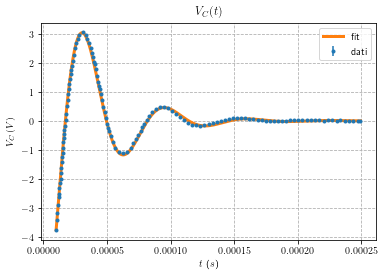

In [2]:
print("---------------------------")
print("Best fit values without errors")
print("---------------------------")
print("V0 =", p_best[0]," +- ",sqrt(diag(pcov)[0]), "V")
print("C =", p_best[1]," +- ",sqrt(diag(pcov)[1]), "F")
print("L =", p_best[2]," +- ",sqrt(diag(pcov)[2]), "H")
print("R =", p_best[3]," +- ",sqrt(diag(pcov)[3]),"$\Omega$")
print("c =", p_best[4]," +- ",sqrt(diag(pcov)[4]),)
print("---------------------------")

fig=plt.figure()
plt.grid(linestyle='--')
plt.rc('text', usetex=True)
plt.errorbar(t_us, V_V, yerr=0, fmt='.', label='dati')
_pts = np.linspace(t_us[0], t_us[-1],100000)
plt.plot(_pts, fitfunc(_pts, *p_best), label="fit",linewidth=3.0)
plt.title("$V_C (t)$ ")
plt.xlabel("$t$ ($ s$)")
plt.ylabel("$V_C \,(V)$")
plt.legend();
#fig.savefig('fitnosigma_rl.pdf')

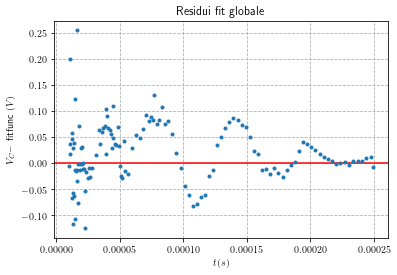

In [3]:
res = []
def sigmapost(t_us,V_V,*p_best):
    sigmasq=0
    for i in range (0,len(t_us)):
        res.insert(i,V_V[i]-fitfunc(t_us[i], *p_best))
        sigmasq+=(res[i])**2
    return sqrt(sigmasq/(len(t_us)-5))
sigma_V=np.full(len(t_us),sigmapost(t_us,V_V,*p_best))
fig=plt.figure()
plt.grid(linestyle='--')
plt.rc('text', usetex=True)
plt.errorbar(t_us, res, yerr=0, fmt='.')
plt.axhline(0, color='r')
plt.title("Residui fit globale")
plt.xlabel("$t (s)$")
plt.ylabel("$V_C-$ fitfunc $(V)$");
fig.savefig('resnosigma_rl.pdf')
#plt.figure(2)
#plt.errorbar(t_us[50:110], V_V[50:110], yerr=sigma_V[50:110], fmt='.')
#plt.title("Voltaggio ai capi di $C$")
#plt.xlabel("tempo [$ s$]")
#plt.ylabel("Voltaggio [V]");

plt.show()

---------------------------
Best fit values with sigma post:
---------------------------
V0 = 7.957793861188901  +-  0.2673538324144569 V
C = 1.0927288729503821e-07  +-  7.026910264460801e-09 F
L = 0.0008211945259864623  +-  3.637881529426443e-05 H
R = 50.767106916759005  +-  4.50400085013823 $\Omega$
c = 7.06116020250652e-16  +-  2.2240538511624633e-07
---------------------------


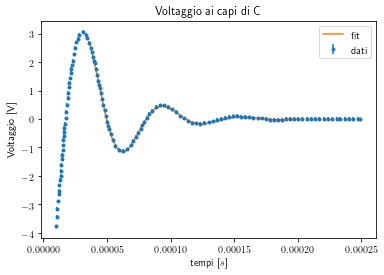

In [4]:
p_init = [7.851763025022773, 1.0541770617671203e-07 ,0.0009193765116236855 , 53.97536084564058,1.884743277007012e-06] # valori iniziali di (A,C,L,R,c,d)

p_best,pcov= optimize.curve_fit(
    fitfunc, t_us[40:110], V_V[40:110],          # assegno funzione di fit, ascisse e ordinate
    sigma=sigma_V[40:110],                     # assegno gli errori sulle ordinate
    p0=p_init, bounds=(0, +np.inf) # imposto i valori iniziali dei parametri e
)      # intervalli ammessi [0, +∞)

print("---------------------------")
print("Best fit values with sigma post:")
print("---------------------------")
print("V0 =", p_best[0]," +- ",sqrt(diag(pcov)[0]), "V")
print("C =", p_best[1]," +- ",sqrt(diag(pcov)[1]), "F")
print("L =", p_best[2]," +- ",sqrt(diag(pcov)[2]), "H")
print("R =", p_best[3]," +- ",sqrt(diag(pcov)[3]),"$\Omega$")
print("c =", p_best[4]," +- ",sqrt(diag(pcov)[4]),)
print("---------------------------")

plt.errorbar(t_us, V_V, yerr=sigma_V, fmt='.', label='dati')
_pts = np.linspace(t_us[40], t_us[110],100000)
plt.plot(_pts, fitfunc(_pts, *p_best), label='fit')
plt.title("Voltaggio ai capi di C")
plt.xlabel("tempi [$ s$]")
plt.ylabel("Voltaggio [V]")
plt.legend();

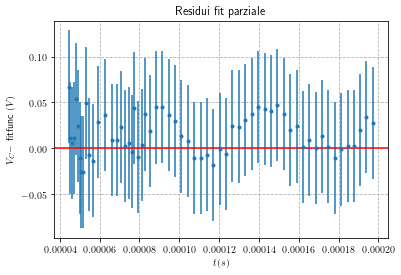

In [5]:
res1 = []
for i in range (50,110):
    res1.insert(i,V_V[i]-fitfunc(t_us[i], *p_best))
fig=plt.figure()
plt.grid(linestyle='--')
plt.rc('text', usetex=True)
plt.errorbar(t_us[50:110], res1, yerr=sigma_V[50:110], fmt='.')
plt.axhline(0, color='r')
plt.title("Residui fit parziale")
plt.xlabel("$t (s)$")
plt.ylabel("$V_C-$ fitfunc $(V)$");
#fig.savefig('ressigmap_rl.pdf')

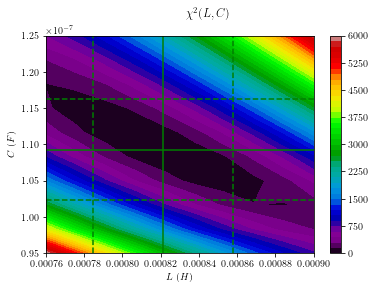

In [8]:
import matplotlib.pyplot as plt

def fitfuncplot(x,Ca,L):
    V0=7.957793861188901
    R=50.767106916759005
    c=7.06116020250652e-16
    #Ca=1.0038462242324967e-07
    #L=0.0009193765235133647
    return -((e**((R*(-c - x))/(2.*L))*V0*(sqrt(-1 + (4*L)/(Ca*R**2))*cos((sqrt(-1 + (4*L)/(Ca*R**2))*R*(c + x))/(2.*L)) + 
            sin((sqrt(-1 + (4*L)/(Ca*R**2))*R*(c + x))/(2.*L))))/sqrt(-1 + (4*L)/(Ca*R**2)))
def chisquared(Ca,L):
    chisq=0
    for i in range (40,110):
        chisq+=((V_V[i]-fitfuncplot(t_us[i],Ca,L))/sigma_V[i])**2
    return chisq
fig=plt.figure()
y=np.linspace(95E-9,125E-9,10)
x=np.linspace(0.76E-3,0.9E-3,10)
#y=np.linspace(52,56,10)
z = np.array([chisquared(j,i) for j in y for i in x])
X, Y = np.meshgrid(x, y)
Z = z.reshape(10, 10)
plt.contourf(X, Y, Z,50,vmin=0,vmax=6050,cmap='nipy_spectral')
fig.suptitle(' $\chi ^2 (L,C)$ ')
plt.xlabel('$L$ $(H)$')
#plt.ylabel('$R$ ($\Omega$)')
plt.ylabel('$C$ $(F)$')
plt.colorbar()
plt.axvline(p_best[2], color='g')
plt.axhline(p_best[1], color='g')
plt.axvline(p_best[2]+sqrt(diag(pcov)[2]),color='g',linestyle='--')
plt.axvline(p_best[2]-sqrt(diag(pcov)[2]),color='g',linestyle='--')
plt.axhline(p_best[1]+sqrt(diag(pcov)[1]),color='g',linestyle='--')
plt.axhline(p_best[1]-sqrt(diag(pcov)[1]),color='g',linestyle='--')
fig.savefig('chisqLCrl.pdf')

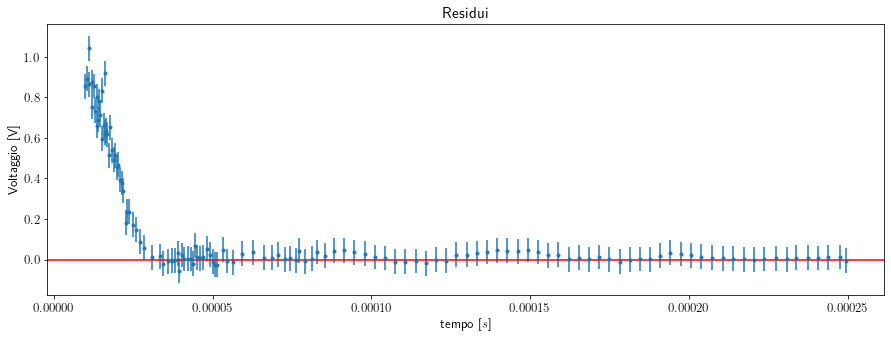

In [10]:
res = []
for i in range (0,len(t_us)):
    res.insert(i,V_V[i]-fitfunc(t_us[i], *p_best))

#plt.rcParams['font.size'] = 13
#plt.rcParams['figure.figsize'] = [15, 5] 
plt.figure(1)
plt.errorbar(t_us, res, yerr=sigma_V, fmt='.')
plt.axhline(0, color='r')
plt.title("Residui")
plt.xlabel("tempo [$ s$]")
plt.ylabel("Voltaggio [V]");

---------------------------
Best fit values with sigmapost and C fixed:
---------------------------
V0 = 7.950283741833327  +-  0.14739128608967145 V
L = 0.0009065727602404372  +-  5.793775393864272e-06 H
R = 56.00269227834667  +-  0.6603356209022399 $\Omega$
c = 1.1643127438691302e-28  +-  2.116656446887376e-07
---------------------------


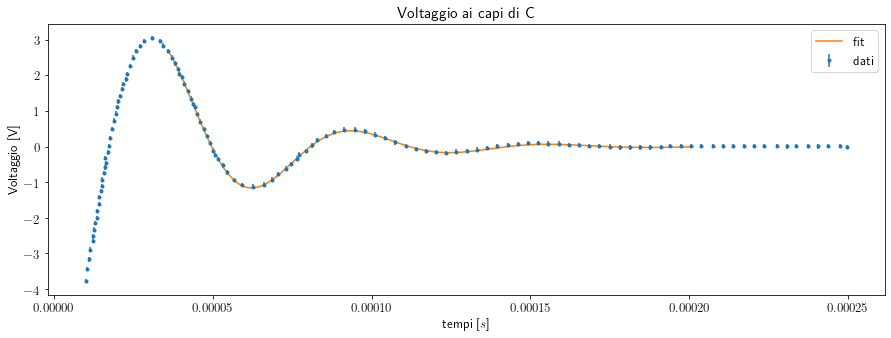

In [11]:
def fitfunc_Cafix(x,V0,L,R,c): 
    Ca=99E-9
    return -((e**((R*(-c - x))/(2.*L))*V0*(sqrt(-1 + (4*L)/(Ca*R**2))*cos((sqrt(-1 + (4*L)/(Ca*R**2))*R*(c + x))/(2.*L)) + 
            sin((sqrt(-1 + (4*L)/(Ca*R**2))*R*(c + x))/(2.*L))))/sqrt(-1 + (4*L)/(Ca*R**2)))
p_init1 = [7.957793861188901,0.0008211945259864623 , 50.767106916759005,7.06116020250652e-16]
p_best1,pcov1= optimize.curve_fit(
    fitfunc_Cafix, t_us[40:110], V_V[40:110],          # assegno funzione di fit, ascisse e ordinate
    sigma=sigma_V[40:110],                     # assegno gli errori sulle ordinate
    p0=p_init1, bounds=(0, +np.inf) # imposto i valori iniziali dei parametri e
)      # intervalli ammessi [0, +∞)

print("---------------------------")
print("Best fit values with sigmapost and C fixed:")
print("---------------------------")
print("V0 =", p_best1[0]," +- ",sqrt(diag(pcov1)[0]), "V")
print("L =", p_best1[1]," +- ",sqrt(diag(pcov1)[1]), "H")
print("R =", p_best1[2]," +- ",sqrt(diag(pcov1)[2]),"$\Omega$")
print("c =", p_best1[3]," +- ",sqrt(diag(pcov1)[3]),)
print("---------------------------")

plt.errorbar(t_us, V_V, yerr=sigma_V, fmt='.', label='dati')
_pts = np.linspace(t_us[40], t_us[110],100000)
plt.plot(_pts, fitfunc_Cafix(_pts, *p_best1), label='fit')
plt.title("Voltaggio ai capi di C")
plt.xlabel("tempi [$ s$]")
plt.ylabel("Voltaggio [V]")
plt.legend();

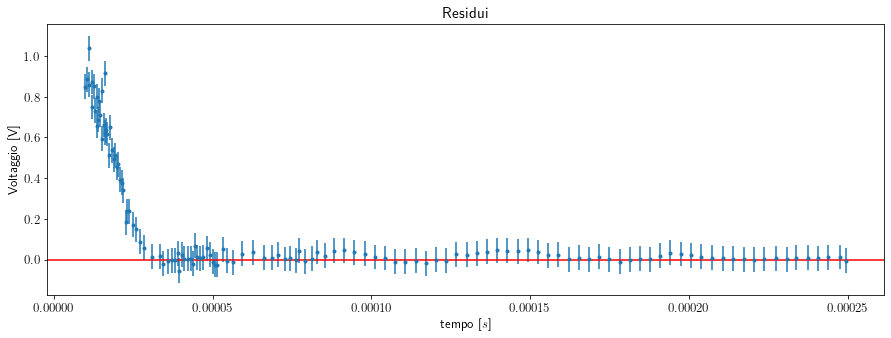

In [12]:
res = []
for i in range (0,len(t_us)):
    res.insert(i,V_V[i]-fitfunc_Cafix(t_us[i], *p_best1))

plt.rcParams['font.size'] = 13
plt.rcParams['figure.figsize'] = [15, 5] 
plt.figure(1)
plt.errorbar(t_us, res, yerr=sigma_V, fmt='.')
plt.axhline(0, color='r')
plt.title("Residui")
plt.xlabel("tempo [$ s$]")
plt.ylabel("Voltaggio [V]");